<a href="https://www.kaggle.com/code/mingtr/python-cheatsheet-for-eda?scriptVersionId=177354160" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Purpose of this notebook

- Provide a cheat sheet of EDA.
- We will not focus on the profound knowledge of EDA here. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
from scipy import stats
! pip install yfinance
import yfinance 

# to ignore some warnings in python
import warnings 
warnings.filterwarnings('ignore')

# display all the columns and rows 
pd.set_option('display.max_rows', 300)
pd.set_option('display.max_colwidth', None),

# set figure size for single graphs 
# plt.rcParams['figure.figsize'] = [15, 6]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.0/73.0 kB 1.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 31.5 MB/s eta 0:00:00
  Installing build dependencies ... - \ | / - done
  Getting requirements to build wheel ... - done
  Preparing metadata (pyproject.toml) ... - done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.6/62.6 kB 6.5 MB/s eta 0:00:00
  Created wheel for peewee: filename=peewee-3.17.5-py3-none-any.whl size=138634 sha256=3aa6848d646b4c06d0b9fd273d8ff7b799b3ca97df03e9a087aba7e05f721359
  Stored in directory: /root/.cache/pip/wheels/1b/af/05/1e75649f4f5065cd7e28cc082dae54a258333d9c70201480bf
Successfully built peewee
  Attempting uninstall: requests
    Found existing installation: requests 2.28.2
    Uninstalling requests-2.28.2:
      Successfully uninstalled requests-2.28.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the followi

(None,)

<a id = "table-of-content"></a>
# Table of content

- [ Import Data and Basic Examination](#1)
- [ Simple plots with df.plot()](#2)
- [ Relationships among variables via plots](#3)
- [ Maths](#4)
- [ Convert df, list, set, zip and mapping](#5)
- [ Export to excel or csv, modify available]  file(#6)


<a id = "1"></a>
# Import Data and Basic Examination

In [2]:
df1 = pd.read_csv("/kaggle/input/car-prices-market/used_car_prices.csv")
df2 = pd.read_csv("/kaggle/input/car-prices-market/new_cars_prices.csv")
# df2 = pd.read_csv("/kaggle/input/car-prices-market/new_cars_prices.csv", sheet_name='new_cars_prices', skiprows=None)

In [3]:
df = yfinance.download(tickers= ['GC=F', 'ADBE', 'AMZN', 'NVDA', 'PKX', 'WMT'], 
                         start="2020-01-30", end="2022-01-30", 
                         group_by='column')['Adj Close']

[*********************100%%**********************]  6 of 6 completed


In [4]:
df1.head()

,web-scraper-order,Car Model,Month/Year,Average price,Minimum price,Maximum price
0,1680204632-1,Skoda Octavia A8 2022,2023-03,"967,000 EGP","926,000 EGP","1,017,000 EGP"
1,1680204632-2,Skoda Octavia A8 2022,2023-02,"979,000 EGP","931,000 EGP","1,045,000 EGP"
2,1680204632-3,Skoda Octavia A8 2022,2023-01,"917,000 EGP","893,000 EGP","950,000 EGP"
3,1680204632-4,Skoda Octavia A8 2022,2022-12,"881,000 EGP","793,000 EGP","950,000 EGP"
4,1680204632-5,Skoda Octavia A8 2022,2022-11,"868,000 EGP","789,000 EGP","950,000 EGP"


In [5]:
df2.head()

,web-scraper-order,Car Model,Old Price,Price Change,New Price,date_range
0,1680210890-1,Porsche Cayenne A/T / Coupe 2020,"2,262,876\nEGP","trending_down\n-82,876\nEGP","2,180,000\nEGP",18/11/2020
1,1680210890-2,Porsche Cayenne A/T / Coupe 2020,"2,078,727\nEGP","trending_up\n+184,149\nEGP","2,262,876\nEGP",14/10/2019
2,1680210890-3,Porsche Cayenne A/T / S 2020,"2,388,000\nEGP","trending_down\n-93,000\nEGP","2,295,000\nEGP",18/11/2020
3,1680210890-4,Porsche Cayenne A/T / S 2020,"2,262,876\nEGP","trending_up\n+125,124\nEGP","2,388,000\nEGP",15/10/2019
4,1680210890-5,Lexus LX 570 Automtic 2020,"5,600,000\nEGP","trending_down\n-350,000\nEGP","5,250,000\nEGP",18/05/2020


In [6]:
df.head()

Ticker,ADBE,AMZN,GC=F,NVDA,PKX,WMT
Date,,,,,,
2020-01-30,356.739990,93.533997,1583.500000,61.210430,46.813900,36.361042
2020-01-31,351.140015,100.435997,1582.900024,58.874668,43.888645,35.709179
2020-02-03,358.000000,100.209999,1577.199951,59.845833,44.076412,35.640549
2020-02-04,366.739990,102.483498,1550.400024,61.539131,44.955971,35.952454
2020-02-05,365.549988,101.993500,1557.800049,62.443054,45.133854,36.432777


## Drop multiple index or headers

In [7]:
#df = df.droplevel(0, axis=1).rename_axis(index=(None, None), columns=None)

## Overview

In [8]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79090 entries, 0 to 79089
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   web-scraper-order  79090 non-null  object
 1   Car Model          79090 non-null  object
 2   Month/Year         78612 non-null  object
 3   Average price      78612 non-null  object
 4   Minimum price      78612 non-null  object
 5   Maximum price      78612 non-null  object
dtypes: object(6)
memory usage: 3.6+ MB


In [9]:
# describe with some aspects only, like max values
df1.describe().loc[['count','top']]

,web-scraper-order,Car Model,Month/Year,Average price,Minimum price,Maximum price
count,79090,79090,78612,78612,78612,78612
top,1680204632-1,Hyundai Excel 1996,2022-11,"76,000 EGP","71,000 EGP","81,000 EGP"


In [10]:
df1.shape

(79090, 6)

In [11]:
df1.dtypes

web-scraper-order    object
Car Model            object
Month/Year           object
Average price        object
Minimum price        object
Maximum price        object
dtype: object

## Unique values, Value counts

In [12]:
# Count number of distinct elements by row
df1.nunique(axis=0, dropna=True)

web-scraper-order    79090
Car Model             1908
Month/Year             128
Average price         1397
Minimum price          893
Maximum price          916
dtype: int64

In [13]:
# Count number of distinct elements by column
df1.nunique(axis=1)

0        6
1        6
2        6
3        6
4        6
        ..
79085    6
79086    6
79087    6
79088    6
79089    6
Length: 79090, dtype: int64

In [14]:
df1['Car Model'].unique()

array(['Skoda Octavia A8 2022', 'Seat Ateca 2021',
       'Jeep Grand Cherokee 2015', ..., 'Lada 2107 1993',
       'Lada 2105 1992', 'Lada 2107 1991'], dtype=object)

In [15]:
df1["Car Model"].value_counts()

Hyundai Excel 1996      128
Chevrolet Cruze 2010    128
Hyundai Verna 2007      128
Daewoo Lanos 2000       128
Chevrolet Optra 2008    128
                       ... 
Ford Focus 2022           2
Hyundai I30 2008          2
DFSK Glory 330 2021       2
Audi Q3 2022              2
Ford B-Max 2014           2
Name: Car Model, Length: 1908, dtype: int64

<a id = "3"></a>
## Column names, index changing

In [16]:
df1.columns

Index(['web-scraper-order', 'Car Model', 'Month/Year', 'Average price',
       'Minimum price', 'Maximum price'],
      dtype='object')

In [17]:
# change the name of columns
df1.columns = ['web_scraper_order', 'Car Model', 'Month/Year', 'Average price', 'Minimum price', 'Maximum price']

In [18]:
# Another way
df1.rename(columns={"web-scraper-order" : "web_scraper_order",
                        "Car Model"         : "car_model",
                        "Month/Year"        : "month_year",
                        "Average price"     : "average_price",
                        "Minimum price"     : "minimum_price",
                        "Maximum price"     :  "maximum_price"}, 
           inplace=True, errors='ignore') # can set raise error if needed

In [19]:
df.reset_index(inplace = True, 
               #drop = True 
              )

## Null values

In [20]:
df1.isnull().values.any()

True

In [21]:
df1.isnull().sum().sort_values(ascending=False)

month_year           478
average_price        478
minimum_price        478
maximum_price        478
web_scraper_order      0
car_model              0
dtype: int64

In [22]:
# print out the rows with null values
df_null_row = df1[df1.isna().any(axis=1)]
df_null_row.head() 

,web_scraper_order,car_model,month_year,average_price,minimum_price,maximum_price
380,1680204632-381,Mercedes 180 2015,NaN,NaN,NaN,NaN
381,1680204632-382,Mercedes 180 2015,NaN,NaN,NaN,NaN
382,1680204632-383,Mercedes 180 2015,NaN,NaN,NaN,NaN
383,1680204632-384,Mercedes 180 2015,NaN,NaN,NaN,NaN
384,1680204632-385,Mercedes 180 2015,NaN,NaN,NaN,NaN


In [23]:
df1.dropna(inplace=True)

In [24]:
# Drop null values with conditions
# Drop the rows where at least one element is missing
# df1.dropna(,inplace=True)

In [25]:
#Define in which columns to look for missing values.
#df.dropna(subset=['name', 'toy'])

In [26]:
# Drop the columns where at least one element is missing.
# df.dropna(axis='columns')

In [27]:
#Drop the rows where all elements are missing.
#df.dropna(how='all')

In [28]:
# drop null values based on a threshold
# df.dropna(thresh = len(df) * 0.2, axis = 1, inplace = True)

## Drop rows based on values

In [29]:
# df2[df2['PARTY_TYPE'].isin(['OTC', 'CSA'])]

## Date and time

In [30]:
# fill all rows in a column with the same values
df['today'] = '2023-05-02'

In [31]:
import datetime
datetime.date(2022, 12, 25)

datetime.date(2022, 12, 25)

In [32]:
from datetime import date
d = date(2022, 12, 25)
print(d)

2022-12-25


In [33]:
from datetime import datetime
# convert 
df['today'] = pd.to_datetime(df['today'])

# Calculate days between 2 columns of datetime 
df['days_count'] = (pd.Timestamp('today') - df['Date']).dt.days
df.head()

Ticker,Date,ADBE,AMZN,GC=F,NVDA,PKX,WMT,today,days_count
0,2020-01-30,356.739990,93.533997,1583.500000,61.210430,46.813900,36.361042,2023-05-02,1565
1,2020-01-31,351.140015,100.435997,1582.900024,58.874668,43.888645,35.709179,2023-05-02,1564
2,2020-02-03,358.000000,100.209999,1577.199951,59.845833,44.076412,35.640549,2023-05-02,1561
3,2020-02-04,366.739990,102.483498,1550.400024,61.539131,44.955971,35.952454,2023-05-02,1560
4,2020-02-05,365.549988,101.993500,1557.800049,62.443054,45.133854,36.432777,2023-05-02,1559


In [34]:
# get the current date and time
datetime.now()

datetime.datetime(2024, 5, 13, 8, 7, 22, 581139)

In [35]:
todays_date = date.today()
print("Today's date =", todays_date)

Today's date = 2024-05-13


In [36]:
# date object of today's date
today = date.today() 

print("Current year:", today.year)
print("Current month:", today.month)
print("Current day:", today.day)

Current year: 2024
Current month: 5
Current day: 13


## String, text

In [37]:
list_col =['average_price','minimum_price','maximum_price']
for i in list_col:
    df1[i] = df1[i].str.strip('EGP')
    df1[i] = df1[i].str.replace(',', '')
    df1[i] = df1[i].str.strip(' ')
    df1[i] = df1[i].astype('int')

In [38]:
df1.dtypes

web_scraper_order    object
car_model            object
month_year           object
average_price         int64
minimum_price         int64
maximum_price         int64
dtype: object

In [39]:
# other
t = '2023-03'
t.split('-')[0]

'2023'

In [40]:
list_year = []
for i in df1['month_year']:
    a = i.split('-')[0]
    list_year.append(a)
df1['year'] = list_year

In [41]:
a_string = 'This is a string'
first_four_letters = a_string[:4]
first_four_letters

'This'

In [42]:
df1.head()

,web_scraper_order,car_model,month_year,average_price,minimum_price,maximum_price,year
0,1680204632-1,Skoda Octavia A8 2022,2023-03,967000,926000,1017000,2023
1,1680204632-2,Skoda Octavia A8 2022,2023-02,979000,931000,1045000,2023
2,1680204632-3,Skoda Octavia A8 2022,2023-01,917000,893000,950000,2023
3,1680204632-4,Skoda Octavia A8 2022,2022-12,881000,793000,950000,2022
4,1680204632-5,Skoda Octavia A8 2022,2022-11,868000,789000,950000,2022


## Filter lines that contain an indicated value

In [43]:
df1[df1['car_model'].str.contains("Seat Ateca 2021")]

,web_scraper_order,car_model,month_year,average_price,minimum_price,maximum_price,year
10,1680204632-11,Seat Ateca 2021,2023-03,960000,903000,998000,2023
11,1680204632-12,Seat Ateca 2021,2023-02,964000,931000,998000,2023
12,1680204632-13,Seat Ateca 2021,2023-01,861000,817000,950000,2023
13,1680204632-14,Seat Ateca 2021,2022-12,868000,817000,903000,2022
14,1680204632-15,Seat Ateca 2021,2022-11,888000,879000,903000,2022
15,1680204632-16,Seat Ateca 2021,2022-10,858000,827000,879000,2022
16,1680204632-17,Seat Ateca 2021,2022-09,751000,689000,793000,2022
17,1680204632-18,Seat Ateca 2021,2022-03,517000,504000,527000,2022


## Fill, slice values

In [44]:
df1.columns

Index(['web_scraper_order', 'car_model', 'month_year', 'average_price',
       'minimum_price', 'maximum_price', 'year'],
      dtype='object')

In [45]:
df1[['car_model','average_price']].head()

,car_model,average_price
0,Skoda Octavia A8 2022,967000
1,Skoda Octavia A8 2022,979000
2,Skoda Octavia A8 2022,917000
3,Skoda Octavia A8 2022,881000
4,Skoda Octavia A8 2022,868000


In [46]:
df1.loc[6:8]

,web_scraper_order,car_model,month_year,average_price,minimum_price,maximum_price,year
6,1680204632-7,Skoda Octavia A8 2022,2022-09,837000,770000,874000,2022
7,1680204632-8,Skoda Octavia A8 2022,2022-08,779000,722000,855000,2022
8,1680204632-9,Skoda Octavia A8 2022,2022-07,675000,608000,722000,2022


## Loop, concat with loop, lamba

In [47]:
# Split Car Full Data into Brand, Model, And Year of The Model

model = df1['car_model'].apply(lambda x: ''.join((x.split()[1],' ',x.split()[2])) if len(x.split()) >3 else x.split()[1])
year = df1['car_model'].apply(lambda x: x.split()[-1])
brand = df1['car_model'].apply(lambda x: x.split()[0])

df1['brand'], df1['model'], df1['model_year'] = brand,model,year

In [48]:
# total rows of 2 dataframes
df1.shape[0] + df2.shape[0]

82045

In [49]:
# total columns of 2 dataframes
df1.shape[1] + df2.shape[1]

16

In [50]:
# Take a small part of dataframe to test
df1_test = df1.head(3)[['web_scraper_order','car_model']]
df2_test = df2.head(3)[['web-scraper-order','Car Model']]

In [51]:
df1_test

,web_scraper_order,car_model
0,1680204632-1,Skoda Octavia A8 2022
1,1680204632-2,Skoda Octavia A8 2022
2,1680204632-3,Skoda Octavia A8 2022


In [52]:
df2_test

,web-scraper-order,Car Model
0,1680210890-1,Porsche Cayenne A/T / Coupe 2020
1,1680210890-2,Porsche Cayenne A/T / Coupe 2020
2,1680210890-3,Porsche Cayenne A/T / S 2020


In [53]:
# concat 2 dataframes with the same number of columns and same names
pd.concat([df1_test,df2_test.rename(columns= {'web-scraper-order':'web_scraper_order',
                                             'Car Model':'car_model'})], ignore_index=True)

,web_scraper_order,car_model
0,1680204632-1,Skoda Octavia A8 2022
1,1680204632-2,Skoda Octavia A8 2022
2,1680204632-3,Skoda Octavia A8 2022
3,1680210890-1,Porsche Cayenne A/T / Coupe 2020
4,1680210890-2,Porsche Cayenne A/T / Coupe 2020
5,1680210890-3,Porsche Cayenne A/T / S 2020


In [54]:
# merge data using a column
# add a random columns for testing
df1_test['color'] = ['red', 'blue', 'green']
df2_test['color'] = ['blue', 'red', 'red']
print(df1_test)
print(df2_test)
df1_test.merge(df2_test, how='inner', on='color')

  web_scraper_order              car_model  color
0      1680204632-1  Skoda Octavia A8 2022    red
1      1680204632-2  Skoda Octavia A8 2022   blue
2      1680204632-3  Skoda Octavia A8 2022  green
  web-scraper-order                         Car Model color
0      1680210890-1  Porsche Cayenne A/T / Coupe 2020  blue
1      1680210890-2  Porsche Cayenne A/T / Coupe 2020   red
2      1680210890-3      Porsche Cayenne A/T / S 2020   red


,web_scraper_order,car_model,color,web-scraper-order,Car Model
0,1680204632-1,Skoda Octavia A8 2022,red,1680210890-2,Porsche Cayenne A/T / Coupe 2020
1,1680204632-1,Skoda Octavia A8 2022,red,1680210890-3,Porsche Cayenne A/T / S 2020
2,1680204632-2,Skoda Octavia A8 2022,blue,1680210890-1,Porsche Cayenne A/T / Coupe 2020


In [55]:
df1_test.merge(df2_test, how='outer', on='color')

,web_scraper_order,car_model,color,web-scraper-order,Car Model
0,1680204632-1,Skoda Octavia A8 2022,red,1680210890-2,Porsche Cayenne A/T / Coupe 2020
1,1680204632-1,Skoda Octavia A8 2022,red,1680210890-3,Porsche Cayenne A/T / S 2020
2,1680204632-2,Skoda Octavia A8 2022,blue,1680210890-1,Porsche Cayenne A/T / Coupe 2020
3,1680204632-3,Skoda Octavia A8 2022,green,NaN,NaN


## Pivot table
https://pandas.pydata.org/pandas-docs/version/1.5.3/user_guide/reshaping.html

In [56]:
# df.pivot(index="date", columns="variable", values="value")

<a id = "2"></a>
# Simple plots with df.plot()

## Line graph

Text(0, 0.5, 'Amazon prices')

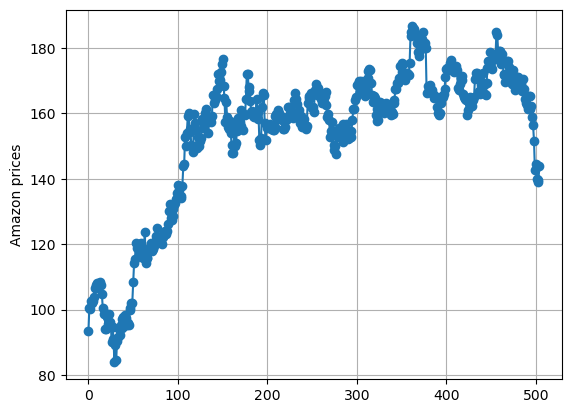

In [57]:
df['AMZN'].plot(marker='o', grid=True).set_ylabel("Amazon prices")

## Histogram and pie chart

<AxesSubplot:ylabel='Frequency'>

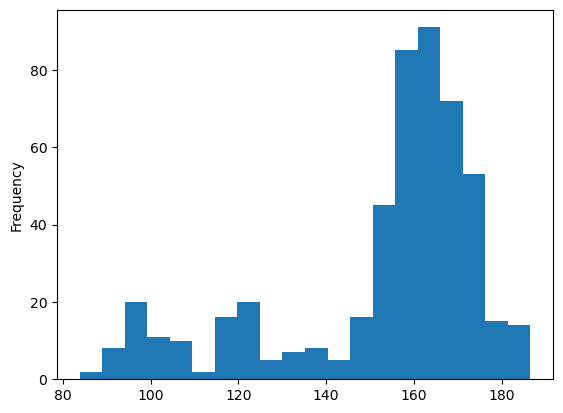

In [58]:
df['AMZN'].plot(kind='hist', bins=20)

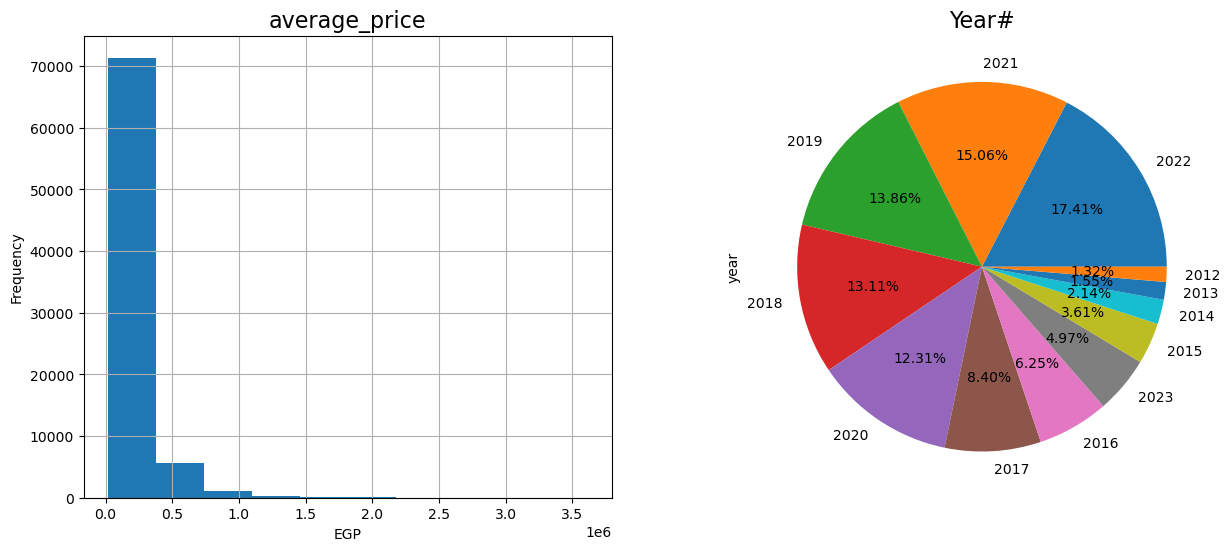

In [59]:
fig, axs = plt.subplots(1, 2, figsize=(15, 6))

df1['average_price'].hist(bins=10,ax=axs[0])
axs[0].set_title('average_price', fontsize=16)
axs[0].set_ylabel("Frequency")
axs[0].set_xlabel("EGP")

df1['year'].value_counts().plot.pie(ax=axs[1], autopct='%.2f%%')
axs[1].set_title('Year#', fontsize=16)
plt.show()

## Bar chart

<AxesSubplot:>

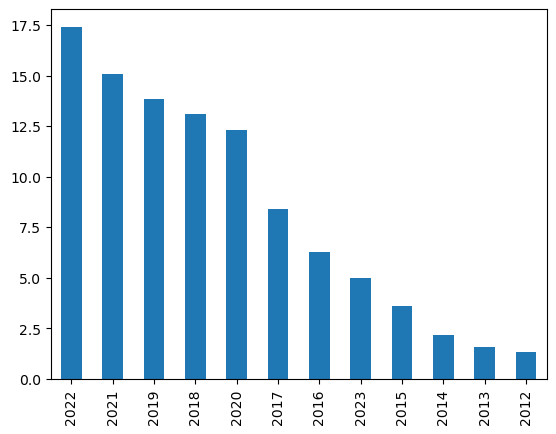

In [60]:
# in percentage
df1['year'].value_counts(normalize=True).mul(100).plot.bar()

## Boxplot

<AxesSubplot:>

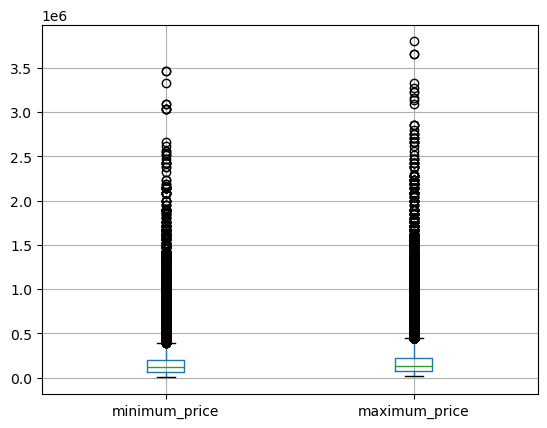

In [61]:
df1.boxplot(column=['minimum_price', 'maximum_price'], grid=True,)

<a id = "3"></a>
# Relationships among variables via plots

## Univariate

In [62]:
df.cov()
df.var()
df.std()

Ticker
Date          211 days 04:18:37.656957236
ADBE                            97.640222
AMZN                            23.624369
GC=F                            95.457577
NVDA                             67.98457
PKX                             15.338281
WMT                               3.58768
today           0 days 00:00:00.000000256
days_count                     211.179603
dtype: object

In [63]:
df.head()

Ticker,Date,ADBE,AMZN,GC=F,NVDA,PKX,WMT,today,days_count
0,2020-01-30,356.739990,93.533997,1583.500000,61.210430,46.813900,36.361042,2023-05-02,1565
1,2020-01-31,351.140015,100.435997,1582.900024,58.874668,43.888645,35.709179,2023-05-02,1564
2,2020-02-03,358.000000,100.209999,1577.199951,59.845833,44.076412,35.640549,2023-05-02,1561
3,2020-02-04,366.739990,102.483498,1550.400024,61.539131,44.955971,35.952454,2023-05-02,1560
4,2020-02-05,365.549988,101.993500,1557.800049,62.443054,45.133854,36.432777,2023-05-02,1559


In [64]:
#skewness and kurtosis
print("Skewness: %f" % df['ADBE'].skew())
print("Kurtosis: %f" % df['ADBE'].kurt())

Skewness: 0.056927
Kurtosis: -0.635965


<AxesSubplot:xlabel='AMZN', ylabel='Density'>

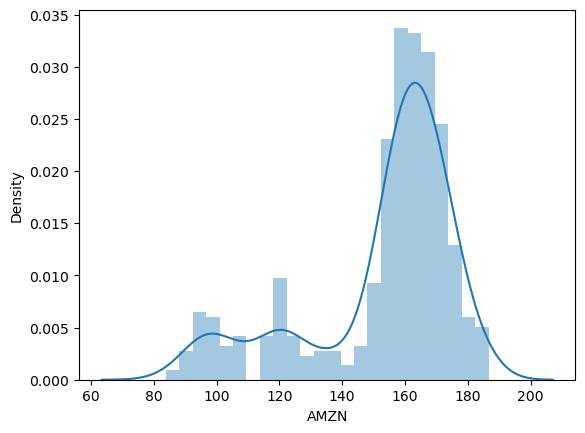

In [65]:
#histogram
sns.distplot(df['AMZN'])

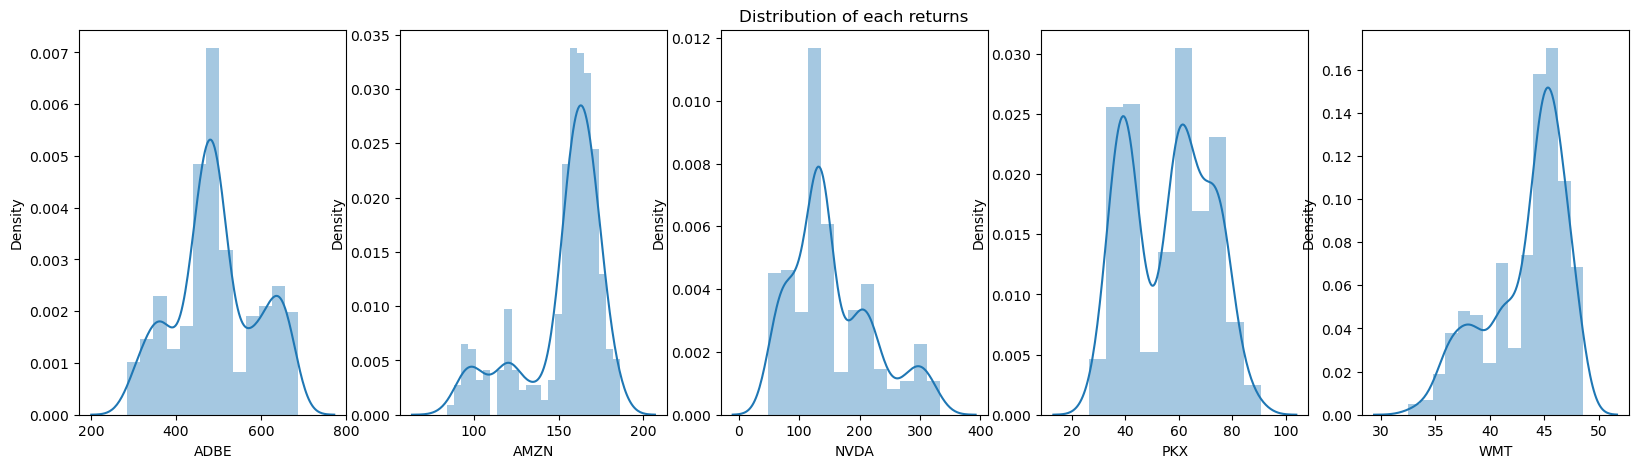

In [66]:
fig, axs = plt.subplots(1, 5, figsize=(20, 5))
sns.distplot(df['ADBE'], ax=axs[0])
sns.distplot(df['AMZN'], ax=axs[1])
sns.distplot(df['NVDA'], ax=axs[2]).set_title("Distribution of each returns")
sns.distplot(df['PKX'], ax=axs[3])
sns.distplot(df['WMT'], ax=axs[4])
plt.show()

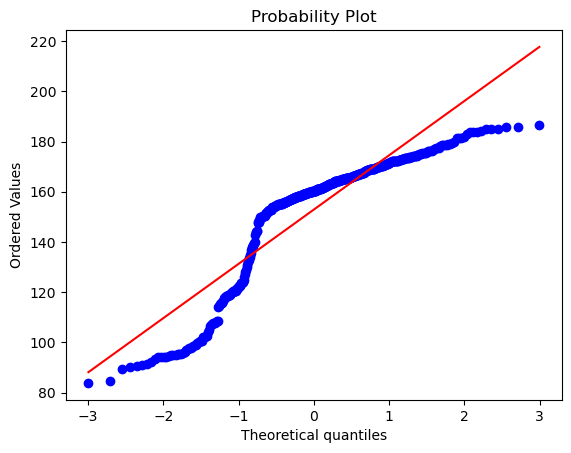

In [67]:
# probability plot
res = stats.probplot(df['AMZN'], plot=plt)

## Bivariate
### Numeric - Numeric

- Correlation Matrix
- Scatterplot

### Correlation Matrix

<AxesSubplot:>

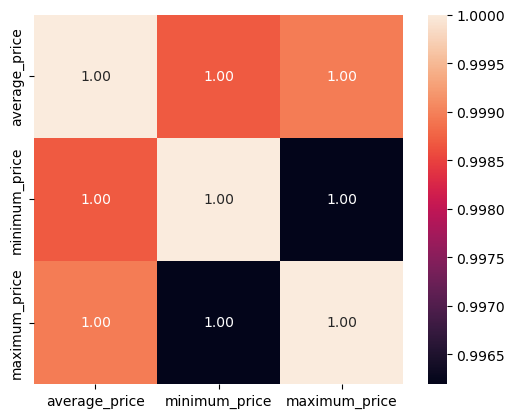

In [68]:
# correlation matrix
cm = df1.corr()
sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10})
# linewidths=1, linecolor='black' for border lines

### Scatterplot

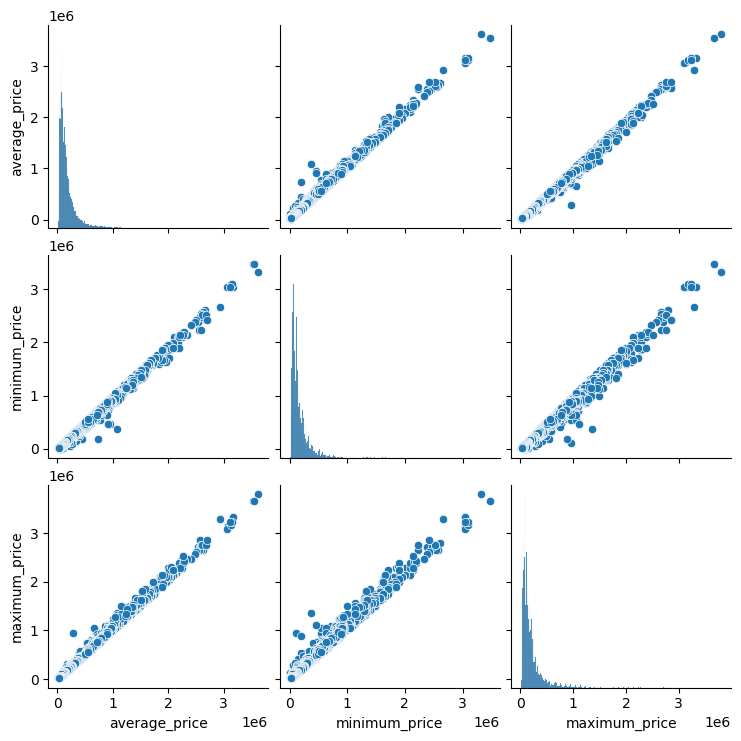

In [69]:
sns.pairplot(data=df1)

## Category - Category dimentions

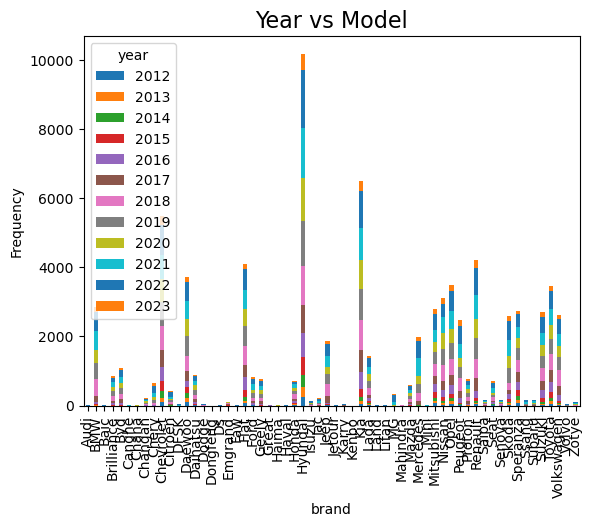

In [70]:
pd.crosstab(df1['brand'], df1['year']).plot(kind='bar', stacked=True)
plt.title('Year vs Model', fontsize=16)
plt.ylabel('Frequency')
plt.show()

## Category - Numeric dimentions

<AxesSubplot:xlabel='year', ylabel='minimum_price'>

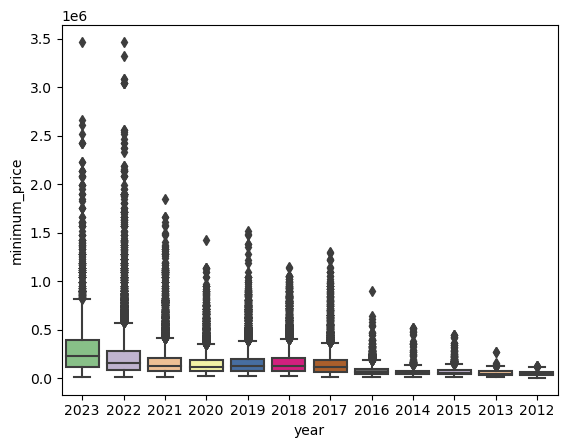

In [71]:
sns.boxplot(x="year", y="minimum_price", data=df1, 
            palette="Accent", #color='g'
           )

<a id = "4"></a>
# Maths

## For trading

In [72]:
# log return
df['ADBE_ret_log'] = np.log(df.ADBE/df.ADBE.shift(1))

In [73]:
# pct return
df['ADBE_ret_pct'] = df['ADBE'] / df['ADBE'].shift(1)
df.head()

Ticker,Date,ADBE,AMZN,GC=F,NVDA,PKX,WMT,today,days_count,ADBE_ret_log,ADBE_ret_pct
0,2020-01-30,356.739990,93.533997,1583.500000,61.210430,46.813900,36.361042,2023-05-02,1565,NaN,NaN
1,2020-01-31,351.140015,100.435997,1582.900024,58.874668,43.888645,35.709179,2023-05-02,1564,-0.015822,0.984302
2,2020-02-03,358.000000,100.209999,1577.199951,59.845833,44.076412,35.640549,2023-05-02,1561,0.019348,1.019536
3,2020-02-04,366.739990,102.483498,1550.400024,61.539131,44.955971,35.952454,2023-05-02,1560,0.024120,1.024413
4,2020-02-05,365.549988,101.993500,1557.800049,62.443054,45.133854,36.432777,2023-05-02,1559,-0.003250,0.996755


In [74]:
# annualized
df.cov()*252
df.std()*np.sqrt(252)

Ticker
Date            3352 days 08:56:03.374827008
ADBE                             1549.990479
AMZN                              375.025238
GC=F                             1515.342061
NVDA                             1079.221591
PKX                               243.487666
WMT                                56.952662
today              0 days 00:00:00.000004063
days_count                       3352.372261
ADBE_ret_log                        0.405824
ADBE_ret_pct                        0.405089
dtype: object

In [75]:
# updating

## Combinations

In [76]:
from itertools import combinations, combinations_with_replacement
 
# Get all combinations of [1, 2, 3]
# and length 2
comb = combinations(['Beer','Whiskey','CubaLibre'], 3)
 
# Print the obtained combinations
for i in list(comb):
    print (i)

('Beer', 'Whiskey', 'CubaLibre')


In [77]:
comb = combinations_with_replacement(['Beer','Whiskey','CubaLibre'], 3)
 
# Print the obtained combinations
for i in list(comb):
    print (i)

('Beer', 'Beer', 'Beer')
('Beer', 'Beer', 'Whiskey')
('Beer', 'Beer', 'CubaLibre')
('Beer', 'Whiskey', 'Whiskey')
('Beer', 'Whiskey', 'CubaLibre')
('Beer', 'CubaLibre', 'CubaLibre')
('Whiskey', 'Whiskey', 'Whiskey')
('Whiskey', 'Whiskey', 'CubaLibre')
('Whiskey', 'CubaLibre', 'CubaLibre')
('CubaLibre', 'CubaLibre', 'CubaLibre')


## Permutation

In [78]:
from itertools import permutations

# Define a list of elements
elements = ['A', 'B', 'C']

# Calculate permutations without repetition
perms = list(permutations(elements, 2))  # Generate permutations of length 2

# Print permutations
print("Permutations without repetition:", perms)


Permutations without repetition: [('A', 'B'), ('A', 'C'), ('B', 'A'), ('B', 'C'), ('C', 'A'), ('C', 'B')]


In [79]:
from itertools import product

# Define a list of elements
elements = ['A', 'B', 'C']

# Calculate permutations with repetition
perms_with_repetition = list(product(elements, repeat=2))  # Generate permutations with repetition of length 2

# Print permutations with repetition
print("Permutations with repetition:", perms_with_repetition)


Permutations with repetition: [('A', 'A'), ('A', 'B'), ('A', 'C'), ('B', 'A'), ('B', 'B'), ('B', 'C'), ('C', 'A'), ('C', 'B'), ('C', 'C')]


<a id = "5"></a>
# Convert df, list, set, zip and mapping

In [80]:
x = df1['car_model'].unique().tolist()
#x

In [81]:
# zip and map
y = ['Category A', 'Category B', 'Category C']
z = dict(zip(x,y))
df1['Category'] = df1['car_model'].map(z)

In [82]:
df1[:15]

,web_scraper_order,car_model,month_year,average_price,minimum_price,maximum_price,year,brand,model,model_year,Category
0,1680204632-1,Skoda Octavia A8 2022,2023-03,967000,926000,1017000,2023,Skoda,Octavia A8,2022,Category A
1,1680204632-2,Skoda Octavia A8 2022,2023-02,979000,931000,1045000,2023,Skoda,Octavia A8,2022,Category A
2,1680204632-3,Skoda Octavia A8 2022,2023-01,917000,893000,950000,2023,Skoda,Octavia A8,2022,Category A
3,1680204632-4,Skoda Octavia A8 2022,2022-12,881000,793000,950000,2022,Skoda,Octavia A8,2022,Category A
4,1680204632-5,Skoda Octavia A8 2022,2022-11,868000,789000,950000,2022,Skoda,Octavia A8,2022,Category A
5,1680204632-6,Skoda Octavia A8 2022,2022-10,797000,789000,808000,2022,Skoda,Octavia A8,2022,Category A
6,1680204632-7,Skoda Octavia A8 2022,2022-09,837000,770000,874000,2022,Skoda,Octavia A8,2022,Category A
7,1680204632-8,Skoda Octavia A8 2022,2022-08,779000,722000,855000,2022,Skoda,Octavia A8,2022,Category A
8,1680204632-9,Skoda Octavia A8 2022,2022-07,675000,608000,722000,2022,Skoda,Octavia A8,2022,Category A
9,1680204632-10,Skoda Octavia A8 2022,2022-06,612000,580000,665000,2022,Skoda,Octavia A8,2022,Category A


In [83]:
s = pd.Series(['1.0', '2', -3])
pd.to_numeric(s, downcast='float')

0    1.0
1    2.0
2   -3.0
dtype: float32

<a id = "6"></a>
# Export to excel or csv, modify available file

In [84]:
#df1.to_csv("old_cars_df.csv", index=False)
#df2.to_csv("new_cars_df.xlsx", sheet_name='Details',index=False)

In [85]:
#with pd.ExcelWriter('new_cars_df.xlsx', engine='openpyxl', mode='a') as writer:  
#    df2.to_excel(writer, sheet_name='Customer2')